In [149]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [150]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/TimeSeries')

Mounted at /content/drive


In [151]:
data=pd.read_csv('TrainingSet.csv', sep=';', header=0, low_memory=False)
data.rename(columns={"DATA": "Date", "Ora": "Hour", "VALORE": "Value"}, inplace=True)

In [152]:
data.info()
#Non ci sono missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17518 entries, 0 to 17517
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    17518 non-null  object
 1   Hour    17518 non-null  int64 
 2   Value   17518 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 410.7+ KB


In [153]:
#riporto i dati dell'ora da un range iniziale che va da 1 a 24 ad uno standard che va da 0 a 23
data['Hour']=data['Hour']-1
data['Hour']=data['Hour'].astype(str)
data['Date_Hour']=pd.to_datetime(data['Date']+'-'+data['Hour'],  format = "%Y-%m-%d-%H" )
data.drop(['Date', 'Hour'], axis='columns', inplace=True)

In [154]:
#Ricerca di dati duplicati per Data e Ora
print(data['Date_Hour'].nunique()!=data.shape[0])
#Non ci sono duplicati

False


In [155]:
#Controllo su date mancanti all'interno del range temporale iniziale
r = pd.date_range(start=data['Date_Hour'].min(), end=data['Date_Hour'].max(), freq='H')
data.set_index('Date_Hour', inplace=True)
data=data.reindex(r)
data.index.rename('Date_Hour', inplace=True)
#Date Mancanti
data.index[data['Value'].isnull()]

DatetimeIndex(['2019-03-31 02:00:00', '2020-03-29 02:00:00',
               '2020-05-31 00:00:00', '2020-05-31 01:00:00',
               '2020-05-31 02:00:00', '2020-05-31 03:00:00',
               '2020-05-31 04:00:00', '2020-05-31 05:00:00',
               '2020-05-31 06:00:00', '2020-05-31 07:00:00',
               '2020-05-31 08:00:00', '2020-05-31 09:00:00',
               '2020-05-31 10:00:00', '2020-05-31 11:00:00',
               '2020-05-31 12:00:00', '2020-05-31 13:00:00',
               '2020-05-31 14:00:00', '2020-05-31 15:00:00',
               '2020-05-31 16:00:00', '2020-05-31 17:00:00',
               '2020-05-31 18:00:00', '2020-05-31 19:00:00',
               '2020-05-31 20:00:00', '2020-05-31 21:00:00',
               '2020-05-31 22:00:00', '2020-05-31 23:00:00'],
              dtype='datetime64[ns]', name='Date_Hour', freq=None)

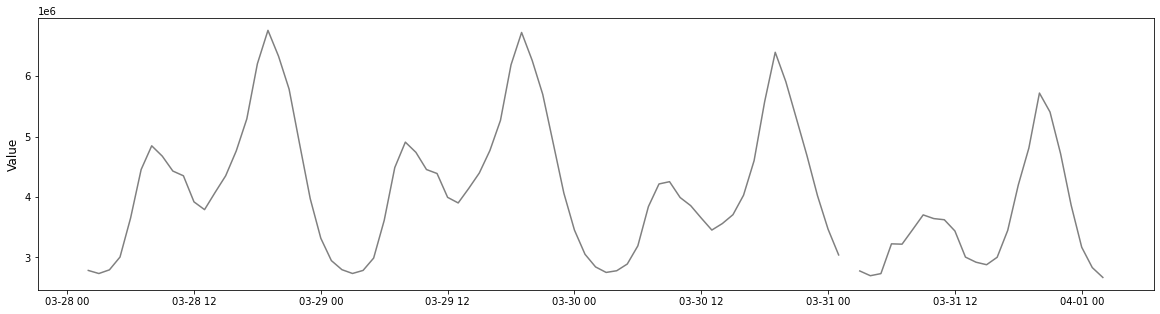

In [156]:
plt.figure(figsize=(20, 5))
plt.plot(data.loc["2019-03-28 02:00:00":"2019-04-01 02:00:00"]['Value'], color='gray')
plt.ylabel('Value', fontsize = 12)
plt.show()

In [157]:
data.loc["2019-03-31 02:00:00"][0]=data.loc["2019-03-31 01:00:00"][0]
data.loc["2020-03-29 02:00:00"][0]=data.loc["2020-03-29 01:00:00"][0]

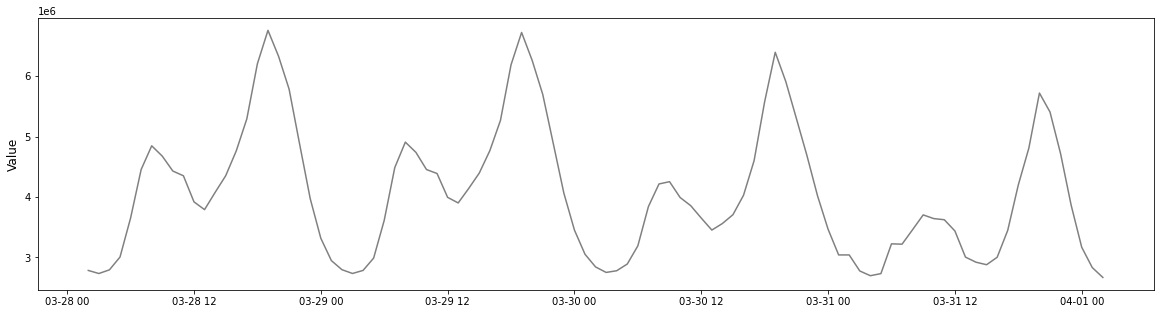

In [158]:
plt.figure(figsize=(20, 5))
plt.plot(data.loc["2019-03-28 02:00:00":"2019-04-01 02:00:00"]['Value'], color='gray')
plt.ylabel('Value', fontsize = 12)
plt.show()

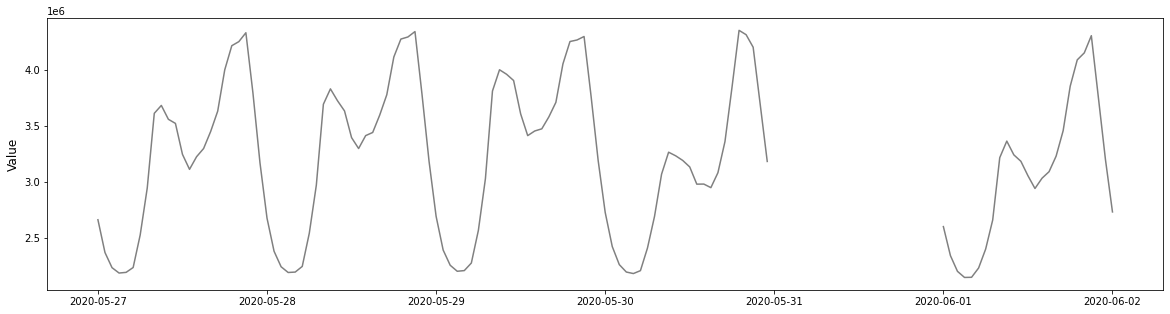

In [159]:
plt.figure(figsize=(20, 5))
plt.plot(data.loc["2020-05-27 00:00:00":"2020-06-2 00:00:00"]['Value'], color='gray')
plt.ylabel('Value', fontsize = 12)
plt.show()

In [160]:
a=0
for i in pd.date_range(start="2020-05-31 00:00:00", end="2020-05-31 23:00:00", freq='H'):
  data.loc[i,'Value']=(data.loc[pd.to_datetime(i)-datetime.timedelta(days=7),'Value']+data.loc[pd.to_datetime(i)+datetime.timedelta(days=7),'Value'])/2
  a=a+1

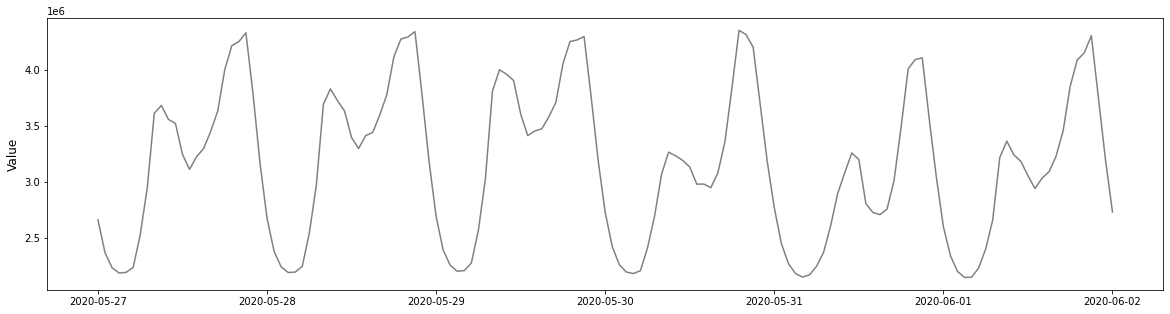

In [161]:
plt.figure(figsize=(20, 5))
plt.plot(data.loc["2020-05-27 00:00:00":"2020-06-2 00:00:00"]['Value'], color='gray')
plt.ylabel('Value', fontsize = 12)
plt.show()

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17544 entries, 2018-09-01 00:00:00 to 2020-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   17544 non-null  float64
dtypes: float64(1)
memory usage: 914.1 KB


In [163]:
#Salvataggio dei dati dopo operazioni di preprocessing
data.to_csv('data_complete.csv')

In [164]:
data=pd.read_csv('data_complete.csv', sep=',', header=0, low_memory=False, parse_dates=['Date_Hour'])
data.set_index('Date_Hour', inplace=True)

In [165]:
data['Year']=data.index.year
data['Month']=data.index.month
data['Dayofweek']=data.index.day_name()
data['Day']=data.index.day
data['Hour']=data.index.hour

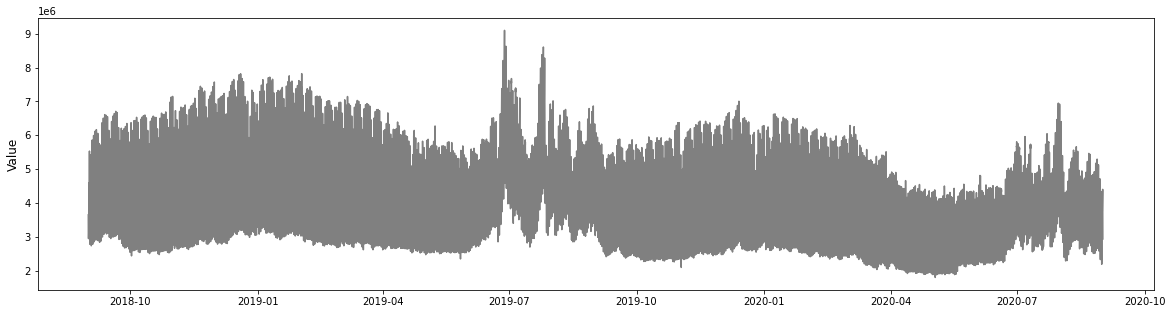

In [166]:
plt.figure(figsize=(20, 5))
plt.plot(data['Value'], color='gray')
plt.ylabel('Value', fontsize = 12)
plt.show()

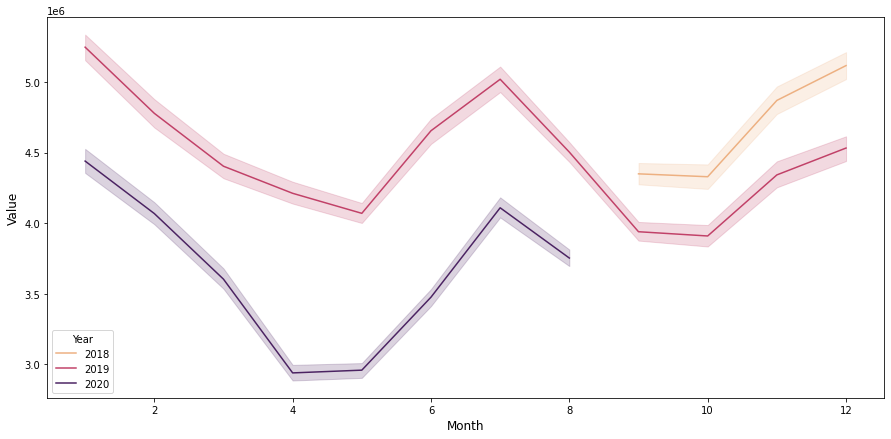

In [167]:
plt.figure(figsize=(15, 7))
sns.lineplot(data['Month'], data['Value'], hue=data['Year'], palette='flare')
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Value', fontsize = 12)
plt.show()

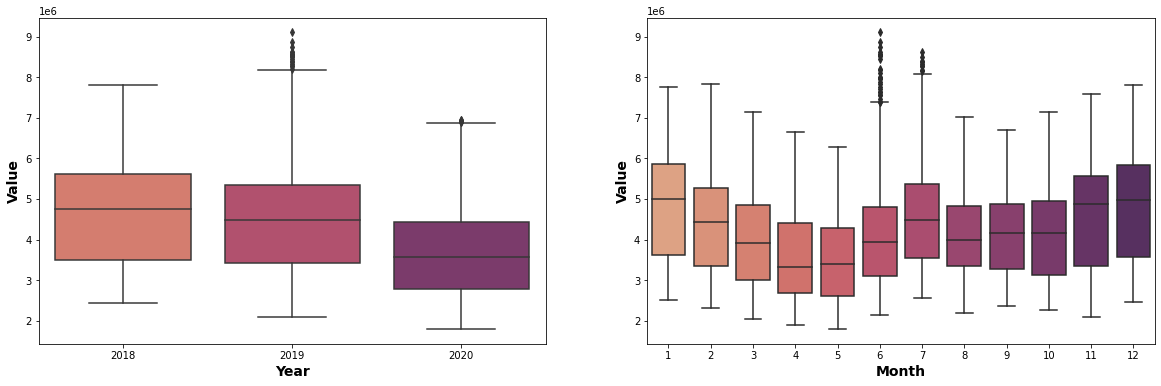

In [128]:
#Box-Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

sns.boxplot(data['Year'], data['Value'], ax=ax[0], palette='flare')
ax[0].set_xlabel('Year', fontsize = 14, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Value', fontsize = 14, fontdict=dict(weight='bold'))


sns.boxplot(data['Month'], data['Value'], ax=ax[1], palette='flare')
ax[1].set_xlabel('Month', fontsize = 14, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Value', fontsize = 14, fontdict=dict(weight='bold'))
plt.show()

                         Value  Year  Month GIORNO_SETTIMANA  Day  Hour
Date_Hour                                                              
2020-08-31 23:00:00  2932544.0  2020      8           Monday   31    23
2019-04-29 16:00:00  4429333.0  2019      4           Monday   29    16
2019-04-29 17:00:00  4614922.0  2019      4           Monday   29    17
2019-04-29 18:00:00  5039727.0  2019      4           Monday   29    18
2019-04-29 19:00:00  5464799.0  2019      4           Monday   29    19
...                        ...   ...    ...              ...  ...   ...
2020-05-17 21:00:00  3800794.0  2020      5           Sunday   17    21
2020-05-17 22:00:00  3317217.0  2020      5           Sunday   17    22
2020-05-17 23:00:00  2807353.0  2020      5           Sunday   17    23
2020-05-17 13:00:00  2388657.0  2020      5           Sunday   17    13
2019-09-01 11:00:00  3953293.0  2019      9           Sunday    1    11

[17544 rows x 6 columns]


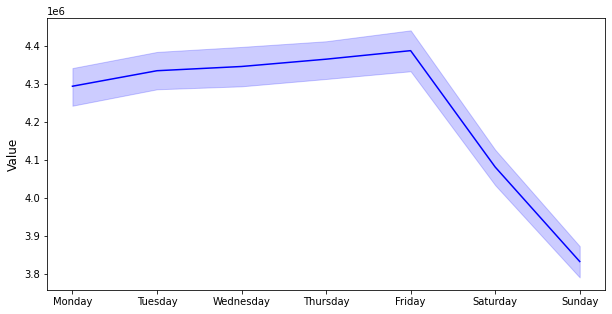

In [129]:
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['GIORNO_SETTIMANA'] = pd.Categorical(data['GIORNO_SETTIMANA'], categories=day, ordered=True)
data = data.sort_values('GIORNO_SETTIMANA')
print (data)
plt.figure(figsize=(10, 5))
sns.lineplot(data['GIORNO_SETTIMANA'], data['Value'], color="blue")
plt.ylabel('Value', fontsize = 12)
plt.xlabel('', fontsize = 12)
plt.show()

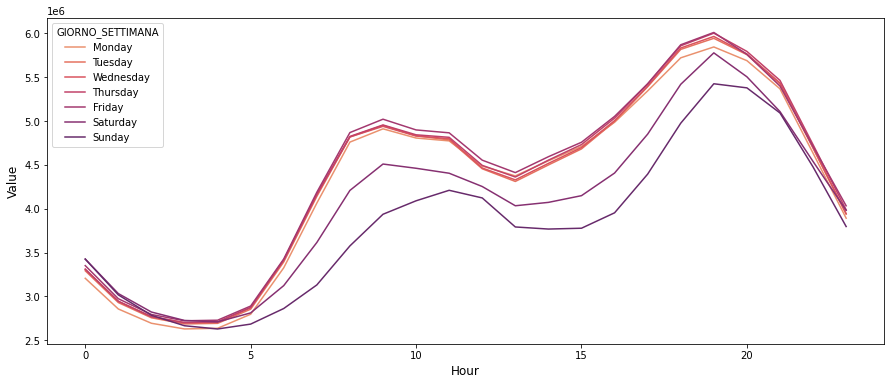

In [130]:
plt.figure(figsize=(15, 6))
sns.lineplot(data['Hour'], data['Value'], hue=data['GIORNO_SETTIMANA'], ci=None, palette="flare")
plt.xlabel('Hour', fontsize = 12)
plt.ylabel('Value', fontsize = 12)
plt.show()

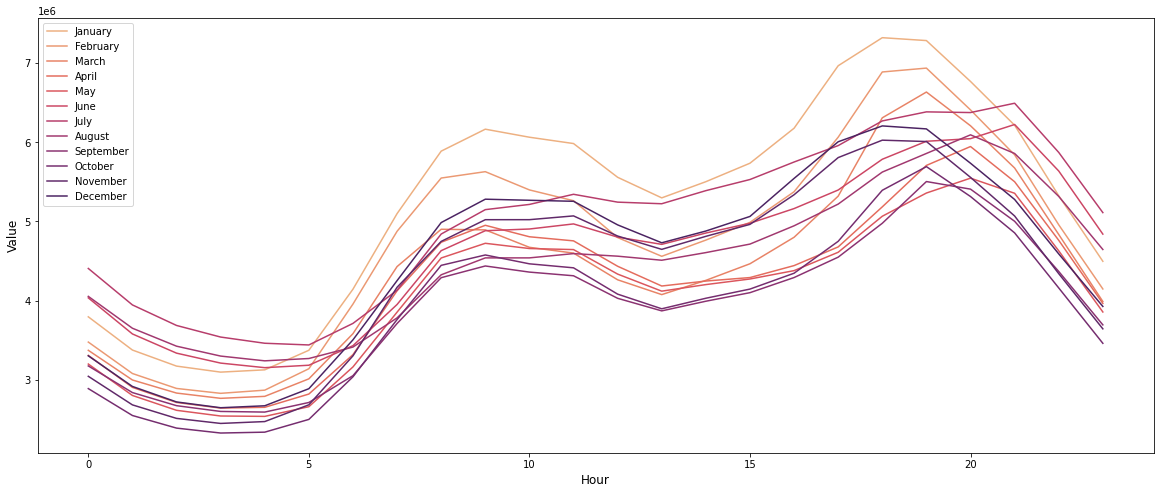

In [131]:
plt.figure(figsize=(20, 8))
sns.lineplot(data.loc["2019-01-01 00:00:00":"2019-12-31 23:00:00"]['Hour'], data['Value'], hue=data['Month'], ci=None, 
             palette='flare')
plt.xlabel('Hour', fontsize = 12)
plt.ylabel('Value', fontsize = 12)
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

In [132]:
data['Date']=pd.to_datetime(data['Year'].astype('str')+'-'+data['Month'].astype('str')+'-'+data['Day'].astype('str'),  format = "%Y-%m-%d" )
pivot=data.pivot_table(index='Date', values='Value', aggfunc='mean')

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(pivot['Value'], color="darkblue")
plt.axvline(x=pivot.index[pivot.index=="2020-03-09"], color='darkred', linewidth=1)
plt.text(pivot.index[pivot.index=="2020-01-17"], 5.9e06, 'inizio lockdown',  fontdict=dict(weight='bold'), color='darkred')
plt.show()

In [168]:
data['covid']=0
data.loc["2020-03-09 00:00:00":]['covid']=1

In [169]:
data.to_csv('data_info.csv')

In [170]:
train=data.loc[:"2020-04-30 23:00:00"]
validation=data.loc["2020-05-01 00:00:00":]

In [ ]:
print('Osservazioni Train: {}'.format(len(train)))
print('Osservazioni Validation: {}'.format(len(validation)))

# ARIMA

In [1]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.deterministic import DeterministicProcess

import warnings
warnings.filterwarnings('ignore')

In [2]:
def adf_test(timeseries):
  print ('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)

In [3]:
def kpss_test(timeseries):
  print ('Results of KPSS Test:')
  kpsstest = kpss(timeseries, regression='c')
  kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
  for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
  print (kpss_output)

In [4]:
def mean_absolute_error(y_true, y_pred): 
  return round(np.mean(np.abs(y_true - y_pred)), 1)

In [5]:
def make_model(p, d, q, P, D, Q, x_train, x_val):
  model = sm.tsa.statespace.SARIMAX(train['Value'],
                                    order=(p, d, q), seasonal_order=(P, D, Q, 24),
                                    exog=x_train,
                                    enforce_stationarity=False, enforce_invertibility=False)
  model = model.fit(disp=0, low_memory=True)
  print('SARIMA({},{},{})({},{},{})24 with AIC:{}'.format(p, d, q, P, D, Q, round(model.aic, 0)))
  
  min=model.loglikelihood_burn
  predicted_train = model.get_prediction(start=train.index[min], end=train.index[-1])
  predicted_train_mean = predicted_train.predicted_mean
  residui_train=train['Value'][min:]-predicted_train_mean

  predicted_val = model.get_prediction(start=validation.index[0], end=validation.index[-1], exog=x_val)
  predicted_val_mean = predicted_val.predicted_mean
  residui_val=validation['Value']-predicted_val_mean

  print("MAE train:", mean_absolute_error(train['Value'][min:], predicted_train_mean))
  print("MAE validation:", mean_absolute_error(validation['Value'], predicted_val_mean),'\n')
  return (predicted_train_mean, predicted_val_mean, residui_train, min)

In [6]:
def make_model_log(p, d, q, P, D, Q, x_train, x_val):
  model = sm.tsa.statespace.SARIMAX(np.log(train['Value']),
                                    order=(p, d, q), seasonal_order=(P, D, Q, 24),
                                    exog=x_train,
                                    enforce_stationarity=False, enforce_invertibility=False)
  model = model.fit(disp=0, low_memory=True)
  print('SARIMA({},{},{})({},{},{})24 with AIC:{}'.format(p, d, q, P, D, Q, round(model.aic, 0)))

  min=model.loglikelihood_burn
  predicted_train = model.get_prediction(start=train.index[min], end=train.index[-1])
  predicted_train_mean = np.exp(predicted_train.predicted_mean)
  residui_train=train['Value'][min:]-predicted_train_mean

  predicted_val = model.get_prediction(start=validation.index[0], end=validation.index[-1], exog=x_val)
  predicted_val_mean = np.exp(predicted_val.predicted_mean)
  residui_val=validation['Value']-predicted_val_mean

  print("MAE train:", mean_absolute_error(train['Value'][min:], predicted_train_mean))
  print("MAE validation:", mean_absolute_error(validation['Value'], predicted_val_mean),'\n')
  return (predicted_train_mean, predicted_val_mean, residui_train, min)

In [7]:
def plot_finale(train, validation, predicted_train_mean, predicted_val_mean, min):
  # Previsioni TRAIN
  plt.figure(figsize=(25, 7))
  plt.plot(train['Value'][min:], color='dimgrey', label='Real')
  plt.plot(predicted_train_mean[min:], color='darkred', label='Predect', alpha=0.7)
  plt.ylabel('Value')
  plt.legend()
  plt.show()

  # Previsioni su TRAIN e VALIDATION
  plt.figure(figsize=(25, 5)))
  plt.plot(train['Value'], color='dimgrey', label='Train')
  plt.plot(validation['Value'], color='darkblue', label='Real')
  plt.plot(predicted_val_mean, color='tomato', label='Predect', alpha=0.7)
  plt.ylabel('Value')
  plt.legend()
  plt.show()

  # Previsioni su VALIDATION
  plt.figure(figsize=(25, 5))
  plt.plot(validation['Value'], color='darkblue', label='Validation')
  plt.plot(predicted_val_mean, color='tomato', label='Predect', alpha=0.9)
  plt.ylabel('Value')
  plt.legend()
  plt.show()

  # Focus su prima parte VALIDATION
  plt.figure(figsize=(25, 5))
  plt.plot(validation['Value'][:800], color='darkblue', label='Real')
  plt.plot(predicted_val_mean[:800], color='tomato', label='Predect', alpha=0.9)
  plt.ylabel('Value')
  plt.legend()
  plt.show()

  # Focus su ultima parte VALIDATION
  plt.figure(figsize=(25, 5))
  plt.plot(validation['Value'][2000:], color='darkblue', label='Real')
  plt.plot(predicted_val_mean[2000:], color='tomato', label='Predect', alpha=0.9)
  plt.ylabel('Value')
  plt.legend()
  plt.show()

In [10]:
data_info=pd.read_csv('data_info.csv', sep=',', header=0, low_memory=False, parse_dates=['Date_Hour'])
data_info.set_index('Date_Hour', inplace=True)

In [11]:
data=pd.read_csv('data_complete.csv', sep=',', header=0, low_memory=False, parse_dates=['Date_Hour'])
data.set_index('Date_Hour', inplace=True)
data.index.freq='H'

In [12]:
train=data.loc[:"2020-04-30 23:00:00"]
validation=data.loc["2020-05-01 00:00:00":]

In [13]:
pivot=data_info.pivot_table(index='Date', values='Value', aggfunc=['mean', 'std'])

In [15]:
adf_test(train['Value'])

Results of Dickey-Fuller Test:
Test Statistic                -5.810651e+00
p-value                        4.409576e-07
Lags Used                      4.200000e+01
Number of Observations Used    1.454900e+04
Critical Value (1%)           -3.430800e+00
Critical Value (5%)           -2.861739e+00
Critical Value (10%)          -2.566876e+00
dtype: float64


In [16]:
kpss_test(train['Value'])

Results of KPSS Test:
Test Statistic            9.070323
p-value                   0.010000
Lags Used                42.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [ ]:
plt.rcParams.update({'figure.figsize':(25,5)})
fig0, axes0 = plt.subplots(1, 2, sharex=True)

axes0[0].plot(train['Value'][:1000], color = 'gray')
axes0[0].set_title('Original')

axes0[1].plot(train['Value'].diff(24).dropna()[:1000], color = 'gray');
axes0[1].set_title('24th Order Differencing')
plt.show()

In [18]:
adf_test(train['Value'].diff(24).dropna())

Results of Dickey-Fuller Test:
Test Statistic                   -22.449561
p-value                            0.000000
Lags Used                         42.000000
Number of Observations Used    14525.000000
Critical Value (1%)               -3.430800
Critical Value (5%)               -2.861739
Critical Value (10%)              -2.566876
dtype: float64


In [19]:
kpss_test(train['Value'].diff(24).dropna())

Results of KPSS Test:
Test Statistic            0.018266
p-value                   0.100000
Lags Used                42.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [ ]:
plt.rcParams.update({'figure.figsize':(25,5)})
fig1, axes1 = plt.subplots(1, 2, sharex=True)
plot_acf(train['Value'], ax=axes1[0])
axes1[0].set_title('ACF - Original')
plot_acf(train['Value'].diff(24).dropna(), ax=axes1[1], lags=50)
axes1[1].set_title('ACF - 24 Order Diff')
plt.show()

In [ ]:
fig2, axes2 = plt.subplots(1, 2, sharex=True)
plot_pacf(train['Value'], ax=axes2[0])
axes2[0].set_title('PACF - Original')
plot_pacf(train['Value'].diff(24).dropna(), ax=axes2[1])
axes2[1].set_title('PACF - 24 Order Diff')
plt.show()

In [ ]:
for p in range(3): 
  for q in range(3):
    _=make_model(p, 0, q, 1, 1, 1, None, None)

In [ ]:
for p in range(3): 
  for q in range(3):
    _=make_model_log(p, 0, q, 1, 1, 1, None, None)

In [22]:
predicted_train_mean, predicted_val_mean, residui_train, min= make_model(2, 0, 2, 1, 1, 1, None, None)

SARIMA(2,0,2)(1,1,1)24 with AIC:377291.0
MAE train: 65584.2
MAE validation: 711547.3 



In [ ]:
plot_finale(train, validation, predicted_train_mean, predicted_val_mean, min)

In [ ]:
for a in range(10, 20, 5):
  for b in range(5, 30, 5):
    four_sett = DeterministicProcess(data.index,  period=168, fourier=a)
    four_ann = DeterministicProcess(data.index,  period=24*365.25, fourier=b)
    print("Armoniche serie di Fourier settimanali: {}, Armoniche serie di Fourier annuali: {}" .format(a, b))
    four=four_sett.in_sample().merge( four_ann.in_sample(), left_index=True, right_index=True)

    x_train=four[:len(train)]
    x_val=four[len(train):]

    _=make_model(2, 0, 2, 1, 1, 1, x_train, x_val)

In [ ]:
four_sett = DeterministicProcess(data.index,  period=168, fourier=10)
four_ann = DeterministicProcess(data.index,  period=24*365.25, fourier=5)
four=four_sett.in_sample().merge( four_ann.in_sample(), left_index=True, right_index=True)

In [ ]:
x_train=four[:len(train)]
x_val=four[len(train):]
x_train['covid']=data_info['covid'][:len(train),]
x_val['covid']=data_info['covid'][len(train):,]

_=make_model(2, 0, 2, 1, 1, 1, x_train, x_val)

In [ ]:
x_train=four[:len(train)]
x_val=four[len(train):]

predicted_train_mean, predicted_val_mean, residui_train, min= make_model(2, 0, 2, 1, 1, 1, x_train, x_val)

In [ ]:
plot_finale(train, validation, predicted_train_mean, predicted_val_mean, min)

In [ ]:
model = sm.tsa.statespace.SARIMAX(train['Value'],
                                  order=(2, 0, 2), seasonal_order=(1, 1, 1, 24),
                                  exog=x_train,
                                  enforce_stationarity=False, enforce_invertibility=False)
model = model.fit(disp=0, low_memory=True)

In [ ]:
print(model.summary())

In [ ]:
fig = plt.figure(figsize=(20, 8))
fig = model.plot_diagnostics(fig=fig, lags=30)

# PREVISIONI SARIMA

In [ ]:
four_sett = DeterministicProcess(pd.date_range(start="2018-09-01 00:00:00", end="2020-10-31 23:00:00", freq='H'),  period=168, fourier=10)
four_ann = DeterministicProcess(pd.date_range(start="2018-09-01 00:00:00", end="2020-10-31 23:00:00", freq='H'),  period=24*365.25, fourier=5)
four=four_sett.in_sample().merge( four_ann.in_sample(), left_index=True, right_index=True)

x_data=four[:len(data)]
x_test=four[len(data):]

model_tot = sm.tsa.statespace.SARIMAX(data['Value'],
                                  order=(2, 0, 2), seasonal_order=(1, 1, 1, 24),
                                  exog=x_data,
                                  enforce_stationarity=False, enforce_invertibility=False)
model_tot = model_tot.fit(low_memory=True)

future = model_tot.get_prediction(start=pd.to_datetime('2020-09-01-0',  format = "%Y-%m-%d-%H"),
                              end=pd.to_datetime('2020-10-31-23',  format = "%Y-%m-%d-%H"),
                              exog=x_test)

forecast = pd.DataFrame({'ARIMA':future.predicted_mean, 
                         'Date':pd.date_range(start="2020-09-01 00:00:00", end="2020-10-31 23:00:00", freq='H')})

forecast.to_csv('ARIMA.csv')

# UCM

In [ ]:
def UCM_model(lev_tre, train, validation, covid):
  if covid==0:
    model = sm.tsa.UnobservedComponents(train['Value'],
                                        lev_tre,
                                        seasonal=24, freq_seasonal = [{'period':24*7, 'harmonics':15}])
    model = model.fit(low_memory=True)
    
    predicted_val = model.get_prediction(start=validation.index[0], end=validation.index[-1])
    predicted_val_mean = predicted_val.predicted_mean
    residui_val=validation['Value']-predicted_val_mean   
  
  
  elif covid==1:
    model = sm.tsa.UnobservedComponents(train['Value'],
                                        lev_tre,
                                        exog=np.array(data_info['covid'])[:len(train)],
                                        seasonal=24, freq_seasonal = [{'period':24*7, 'harmonics':15}])  
    model = model.fit()

    predicted_val = model.get_prediction(start=validation.index[0], end=validation.index[-1], 
                                        exog=np.array(data_info['covid'])[len(train):,].reshape(len(validation), 1))
    predicted_val_mean = predicted_val.predicted_mean
    residui_val=validation['Value']-predicted_val_mean
  
  min=model.loglikelihood_burn
  predicted_train = model.get_prediction(start=train.index[min], end=train.index[-1])
  predicted_train_mean = predicted_train.predicted_mean
  residui_train=train['Value'][min:]-predicted_train_mean

  print("level-trend: {}" .format(lev_tre))
  print("MAE train:", mean_absolute_error(train['Value'][min:], predicted_train_mean))
  print("MAE validation:", mean_absolute_error(validation['Value'], predicted_val_mean), '\n')

In [ ]:
data=pd.read_csv('data_complete.csv', sep=',', header=0, low_memory=False, parse_dates=['Date_Hour'])
data.set_index('Date_Hour', inplace=True)

data_info=pd.read_csv('data_info.csv', sep=',', low_memory=False, parse_dates=['Date_Hour'])
data_info.set_index('Date_Hour', inplace=True)

train=data.loc[:"2020-04-30 23:00:00"]
validation=data.loc["2020-05-01 00:00:00":]

In [ ]:
#Senza la variabile Covid19
for lev_tre in ['rwalk', 'dconstant', 'ntrend', 'llevel', 'lldtrend', 'rwdrift', 'lltrend', 'strend', 'rtrend']:
  UCM_model(lev_tre, train, validation, covid=0)

In [ ]:
#Con la variabile Covid19
for lev_tre in ['rwalk', 'llevel', 'lldtrend', 'rwdrift']:
  UCM_model(lev_tre, train, validation, covid=1)

In [ ]:
model = sm.tsa.UnobservedComponents(train['Value'],
                                    'rwdrift',
                                    seasonal=24, freq_seasonal = [{'period':24*7, 'harmonics':15}])
model = model.fit(low_memory=True)

In [ ]:
min=model.loglikelihood_burn
predicted_train = model.get_prediction(start=train.index[min], end=train.index[-1])
predicted_train_mean = predicted_train.predicted_mean
residui_train=train['Value'][min:]-predicted_train_mean

predicted_val = model.get_prediction(start=validation.index[0], end=validation.index[-1])
predicted_val_mean = predicted_val.predicted_mean
residui_val=validation['Value']-predicted_val_mean

print("MAE train:", mean_absolute_error(train['Value'][min:], predicted_train_mean))
print("MAE validation:", mean_absolute_error(validation['Value'], predicted_val_mean))

MAE train: 102623.3
MAE validation: 743458.6


In [ ]:
plot_finale(train, validation, predicted_train_mean, predicted_val_mean, min)

# PREVISIONI UCM

In [ ]:
model_tot = sm.tsa.UnobservedComponents(data['Value'],
                                    'rwdrift',
                                    seasonal=24, freq_seasonal = [{'period':24*7, 'harmonics':15}])
model_tot = model_tot.fit(low_memory=True)

In [ ]:
future = model_tot.get_prediction(start=pd.to_datetime('2020-09-01-0',  format = "%Y-%m-%d-%H"),
                                end=pd.to_datetime('2020-10-31-23',  format = "%Y-%m-%d-%H"))

In [ ]:
forecast = pd.DataFrame({'UCM':future.predicted_mean, 
                         'Date':pd.date_range(start="2020-09-01 00:00:00", end="2020-10-31 23:00:00", freq='H')})

In [ ]:
forecast.to_csv('UCM.csv')

# TBATS

In [ ]:
from tbats import TBATS, BATS

In [ ]:
def plot_finale(train, validation):
  # Previsioni su TRAIN
  plt.figure(figsize=(25, 5))
  plt.plot(train['Value'], color='dimgrey', label='Real')
  plt.plot(train['predicted_train'], color='darkred', label='Predect', alpha=0.7)
  plt.ylabel('Value')
  plt.legend()
  plt.show()

  # Previsioni su TRAIN e VALIDATION
  plt.figure(figsize=(25, 5))
  plt.plot(train['Value'], color='dimgrey', label='Train')
  plt.plot(validation['Value'], color='darkblue', label='Real')
  plt.plot(validation['predicted_val'], color='tomato', label='Predect', alpha=0.7)
  plt.ylabel('Value')
  plt.legend()
  plt.show()

  # Previsioni su VALIDATION
  plt.figure(figsize=(25, 5))
  plt.plot(validation['Value'], color='darkblue', label='Validation')
  plt.plot(validation['predicted_val'], color='tomato', label='Predect', alpha=0.9)
  plt.ylabel('Value')
  plt.legend()
  plt.show()

  # Focus su prima parte VALIDATION
  plt.figure(figsize=(25, 5))
  plt.plot(validation['Value'][:800], color='darkblue', label='Real')
  plt.plot(validation['predicted_val'][:800], color='tomato', label='Predect', alpha=0.9)
  plt.ylabel('Value')
  plt.legend()
  plt.show()

  # Focus su ultima parte VALIDATION
  plt.figure(figsize=(25, 5))
  plt.plot(validation['Value'][2000:], color='darkblue', label='Real')
  plt.plot(validation['predicted_val'][2000:], color='tomato', label='Predect', alpha=0.9)
  plt.ylabel('Value')
  plt.legend()
  plt.show()

In [ ]:
data=pd.read_csv('data_complete.csv', sep=',', header=0, low_memory=False, parse_dates=['Date_Hour'])
data.set_index('Date_Hour', inplace=True)
data.index.freq='H'

In [ ]:
train=data.loc[:"2020-04-30 23:00:00"]
validation=data.loc["2020-05-01 00:00:00":]

In [ ]:
model = TBATS(
    seasonal_periods=[24, 168, 8760])

model = model.fit(train['Value'])

validation['predicted_val'] = model.forecast(steps=2952)
train['predicted_train'] = model.y_hat

print("MAE train:", mean_absolute_error(train['Value'], train['predicted_train']))
print("MAE validation:", mean_absolute_error(validation['Value'], validation['predicted_val']))

In [ ]:
plot_finale(train, validation)

# PREVISIONI TBATS

In [ ]:
model_tot = TBATS(seasonal_periods=[24, 168, 8766])
model_tot = model_tot.fit(data['Value'])

forecast = pd.DataFrame({'TBATS':model_tot.forecast(steps=1464), 
                         'Date':pd.date_range(start="2020-09-01 00:00:00", end="2020-10-31 23:00:00", freq='H')})

forecast.to_csv('TBATS.csv')

# LSTM

In [ ]:
from tensorflow.keras import Sequential

from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from keras.layers import LSTM, Dense, Dropout, Activation, BatchNormalization, Dropout, LeakyReLU
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
def split_sequence(sequence, n_steps_in, n_steps_out):
  X, y = list(), list()
  for i in range(len(sequence)):
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out
    if out_end_ix > len(sequence):
      break
    seq_x, seq_y = list(sequence['Value'][i:end_ix]), list(sequence['Value'][end_ix:out_end_ix])
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [ ]:
def preprocess_data(X, scaler=None):
    if not scaler:
        scaler = MinMaxScaler(feature_range=(0.01, 1))
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler

In [ ]:
def data_preparation(n_steps_in, n_steps_out, train_st, n_features=1):
  X, y = split_sequence(train_st, n_steps_in, n_steps_out)
  X = X.reshape((X.shape[0], X.shape[1], n_features))
  return X, y

In [ ]:
def plot_finale(train, validation, predicted_val_mean):

  # Previsioni su TRAIN e VALIDATION
  plt.figure(figsize=(25, 5))
  plt.plot(train['Value'], color='dimgrey', label='Train')
  plt.plot(validation['Value'], color='darkblue', label='Real')
  plt.plot(predicted_val_mean, color='tomato', label='Predect', alpha=0.7)
  plt.ylabel('Value')
  plt.legend()
  plt.show()

  # Previsioni su VALIDATION
  plt.figure(figsize=(25, 5))
  plt.plot(validation['Value'], color='darkblue', label='Validation')
  plt.plot(predicted_val_mean, color='tomato', label='Predect')
  plt.ylabel('Value')
  plt.legend()
  plt.show()

  # Focus su prima parte VALIDATION
  plt.figure(figsize=(25, 5))
  plt.plot(validation['Value'][:800], color='darkblue', label='Real')
  plt.plot(predicted_val_mean[:800], color='tomato', label='Predect')
  plt.ylabel('Value')
  plt.legend()
  plt.show()

  # Focus su ultima parte VALIDATION
  plt.figure(figsize=(25, 5))
  plt.plot(validation['Value'][-800:], color='darkblue', label='Real')
  plt.plot(predicted_val_mean[-800:], color='tomato', label='Predect')
  plt.ylabel('Value')
  plt.legend()
  plt.show()

In [ ]:
data=pd.read_csv('data_complete.csv', sep=',', header=0, low_memory=False, parse_dates=['Date_Hour'])
data.set_index('Date_Hour', inplace=True)
data.index.freq='H'

In [ ]:
train=data.loc[:"2020-07-01 23:00:00"]
validation=data.loc["2020-07-02 00:00:00":]

train_st=data.loc[:"2020-07-01 23:00:00"].copy()

train_st['Value'], scaler = preprocess_data(train_st)

In [ ]:
data_st=data.copy()
data_st['Value'], scaler1 = preprocess_data(data_st)

In [ ]:
n_steps_in, n_steps_out= 24*31, 24*31
X, y = data_preparation(n_steps_in, n_steps_out, train_st)
n_features=1

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(n_steps_in, n_features))) 
model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mae')

model.fit(X, y, epochs=5, verbose=1, shuffle=False)

In [ ]:
prev_st=[]
x_input = np.array(train_st[-n_steps_in:])
for i in range(int(len(validation)/n_steps_out)+1):
  x_input = x_input[-n_steps_in:]
  yhat = model.predict(x_input.reshape(1, n_steps_in, n_features), verbose=0)
  for j in range(n_steps_out):
    prev_st.append(yhat[0][j])
  x_input=np.vstack([x_input, yhat[0].reshape(yhat[0].shape[0], 1)])
  del yhat

In [ ]:
prev = scaler.inverse_transform(np.array(prev_st).reshape(-1,1))
pred_final = pd.DataFrame(prev[:len(validation)], index=validation.index, columns=['Value'])

In [ ]:
_, y = data_preparation(n_steps_in, n_steps_out, train)
print("MAE train:", mean_absolute_error(scaler.inverse_transform(model.predict(X)), y))
print("MAE validation:", mean_absolute_error(validation['Value'], pred_final['Value']))

In [ ]:
model.summary()

In [ ]:
plot_finale(train, validation, pred_final ['Value'])
del model

# PREVISIONI LSTM

In [ ]:
n_features = 1
n_steps_in, n_steps_out= 24*31, 24*31
X, y = data_preparation(n_steps_in, n_steps_out, data_st)

In [ ]:
model = Sequential()
model.add(LSTM(200, input_shape=(n_steps_in, n_features))) 
model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mae')

model.fit(X, y, epochs=5, verbose=1, shuffle=False)

In [ ]:
len_for=len(pd.date_range(start="2020-09-01 00:00:00", end="2020-10-31 23:00:00", freq='H'))

In [ ]:
prev_st=[]
x_input = np.array(data_st[-n_steps_in:])
for i in range(int(len_for/n_steps_out)+1):
  x_input = x_input[-n_steps_in:]
  yhat = model.predict(x_input.reshape(1, n_steps_in, n_features), verbose=0)
  for j in range(n_steps_out):
    prev_st.append(yhat[0][j])
  x_input=np.vstack([x_input, yhat[0].reshape(yhat[0].shape[0], 1)])
  del yhat

In [ ]:
prev = scaler.inverse_transform(np.array(prev_st).reshape(-1,1))
pred_final = pd.DataFrame(prev[:len(validation)], index=validation.index, columns=['Value'])

In [ ]:
forecast = pd.DataFrame({'LSTM': prev_st[:len_for], 'Date': pd.date_range(start="2020-09-01 00:00:00", end="2020-10-31 23:00:00", freq='H')})
forecast.set_index('Date', inplace=True)
forecast['LSTM'] = scaler1.inverse_transform(forecast)

In [ ]:
forecast.reset_index(inplace=True)

In [ ]:
forecast.to_csv('LSTM.csv')

# PROPHET

In [ ]:
from fbprophet import Prophet
import itertools
from fbprophet.diagnostics import cross_validation, performance_metrics

In [ ]:
data=pd.read_csv('data_complete.csv', sep=',', header=0, low_memory=False, parse_dates=['Date_Hour'])
data.index.freq='H'

In [ ]:
data.rename(columns={"Date_Hour": "ds", "Value": "y",}, inplace=True)

In [ ]:
data['covid']=0
data.loc[data[data['ds']=="2020-03-09 00:00:00"].index[0]:]['covid']=1

In [ ]:
train=data[data['ds']<="2020-04-30 23:00:00"]
validation=data[data['ds']>"2020-04-30 23:00:00"]

In [ ]:
model = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.01, seasonality_prior_scale=0.01)
model.add_regressor('covid')

model.fit(train)

In [ ]:
model.seasonalities

In [ ]:
in_sample_forecast = model.predict(train[['ds', 'covid']])
out_sample_forecast = model.predict(validation[['ds', 'covid']])

In [ ]:
print("MAE train:", mean_absolute_error(train['y'], in_sample_forecast['yhat']))
print("MAE validation:", mean_absolute_error(validation['y'].reset_index(drop=True), out_sample_forecast['yhat']))

In [ ]:
fig1= model.plot(in_sample_forecast)

In [ ]:
fig2=model.plot(out_sample_forecast)

In [ ]:
fig3 = model.plot_components(in_sample_forecast)

In [ ]:
in_sample_forecast.set_index('ds', inplace=True)
out_sample_forecast.set_index('ds', inplace=True)
train.set_index('ds', inplace=True)
validation.set_index('ds', inplace=True)

In [ ]:
plot_finale(train, validation, in_sample_forecast['yhat'], out_sample_forecast['yhat'])

In [ ]:
train.reset_index(inplace=True)
validation.reset_index(inplace=True)

In [ ]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
maes = [] 

for params in all_params:
    m = Prophet(yearly_seasonality=True, **params).add_regressor('covid').fit(data)  # Fit model with given params
    df_cv = cross_validation(m, initial = '366 days', period='100 days', horizon='61 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    maes.append(df_p['mae'].values[0])

In [ ]:
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = maes
print(tuning_results)

In [ ]:
best_params = all_params[np.argmin(maes)]
print(best_params)

In [ ]:
model_tot = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.01, 
                                             seasonality_prior_scale=0.01)
model_tot.add_regressor('covid')

model_tot.fit(data)

future = model_tot.make_future_dataframe(periods=61*24,  freq='H', include_history=False)
future['covid']=1

forecast = model_tot.predict(future)

In [ ]:
forecast = model_tot.predict(future)
forecast=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
fig4=model_tot.plot(forecast)

In [ ]:
forecast.drop(['yhat_lower', 'yhat_upper'], axis='columns', inplace=True)
forecast.rename(columns={"ds": "Date", "yhat": "prophet"}, inplace=True)
forecast.to_csv('prophet.csv')

# CSV FINALE

In [31]:
def final_plot(data, final, mod, color):
  plt.figure(figsize=(25, 5))
  plt.plot(data['Value'], color='dimgrey')
  plt.plot(final[mod], color=color, alpha=0.7)
  plt.ylabel('Value')
  plt.show()

In [32]:
data=pd.read_csv('data_complete.csv', sep=',', header=0, low_memory=False, parse_dates=['Date_Hour'])
data.set_index('Date_Hour', inplace=True)

ARIMA=pd.read_csv('ARIMA.csv', parse_dates=['Date'])
ARIMA.set_index('Unnamed: 0', inplace=True)

UCM=pd.read_csv('UCM.csv', parse_dates=['Date'])
UCM.set_index('Unnamed: 0', inplace=True)

TBATS=pd.read_csv('TBATS.csv', parse_dates=['Date'])
TBATS.set_index('Unnamed: 0', inplace=True)

prophet=pd.read_csv('prophet.csv', parse_dates=['Date'])
prophet.set_index('Unnamed: 0', inplace=True)

LSTM=pd.read_csv('LSTM.csv', parse_dates=['Date'])
LSTM.set_index('Unnamed: 0', inplace=True)

In [10]:
final=prophet.merge(ARIMA).merge(UCM).merge(TBATS).merge(LSTM)
final.set_index('Date', inplace=True)

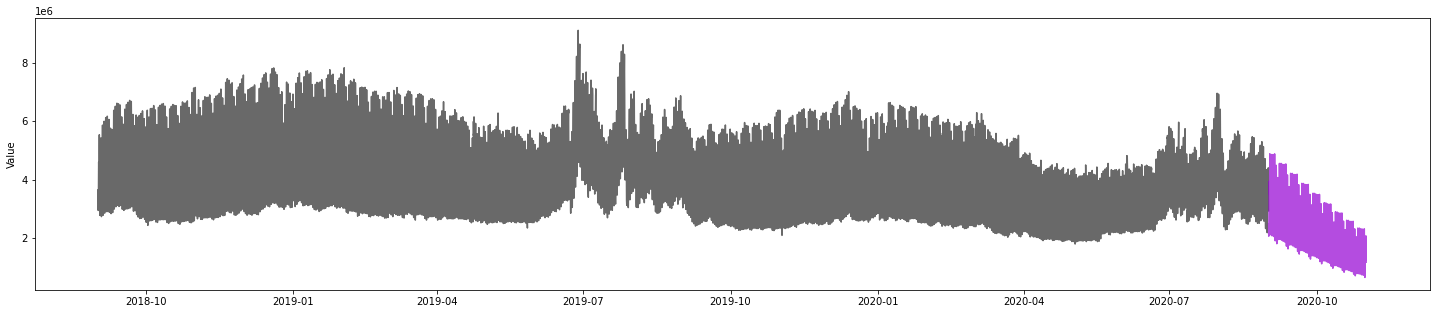

In [34]:
#plot TBATS
final_plot(data, final, 'TBATS', 'darkviolet')

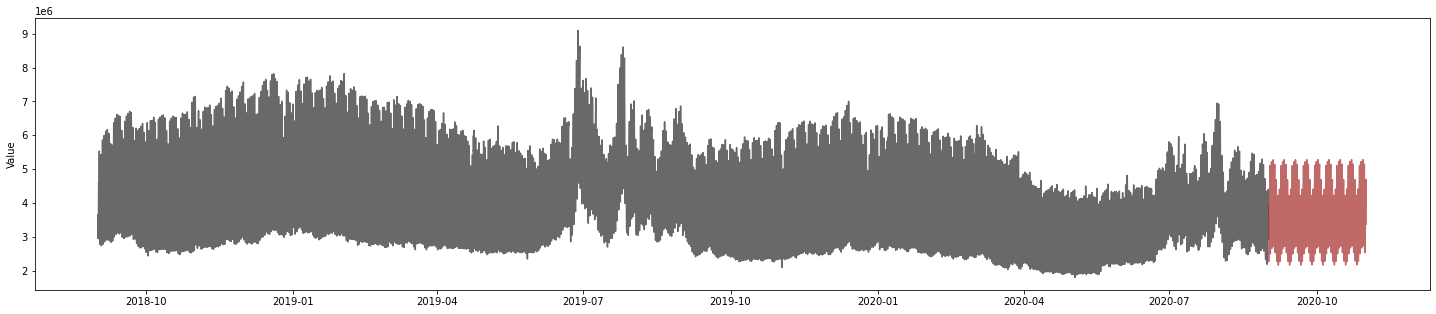

In [39]:
#plot UCM
final_plot(data, final, 'UCM', 'brown')

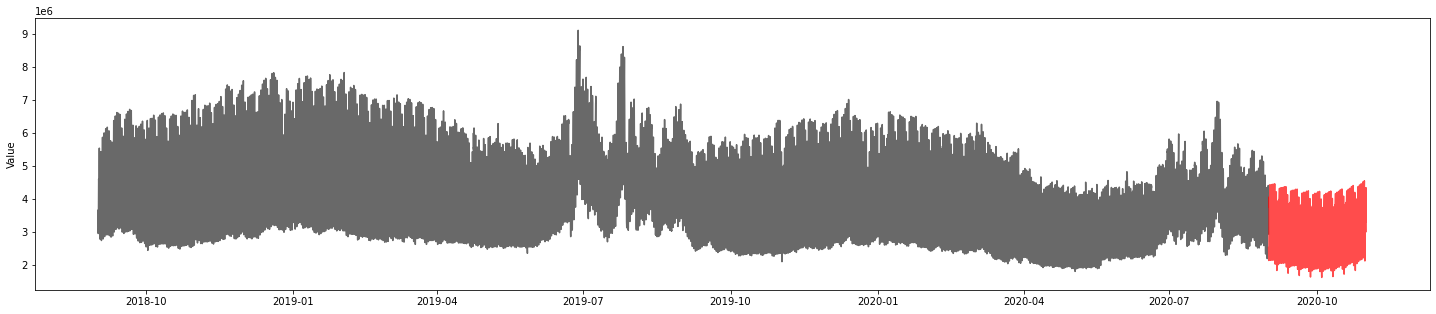

In [33]:
#plot ARIMA
final_plot(data, final, 'ARIMA', 'red')

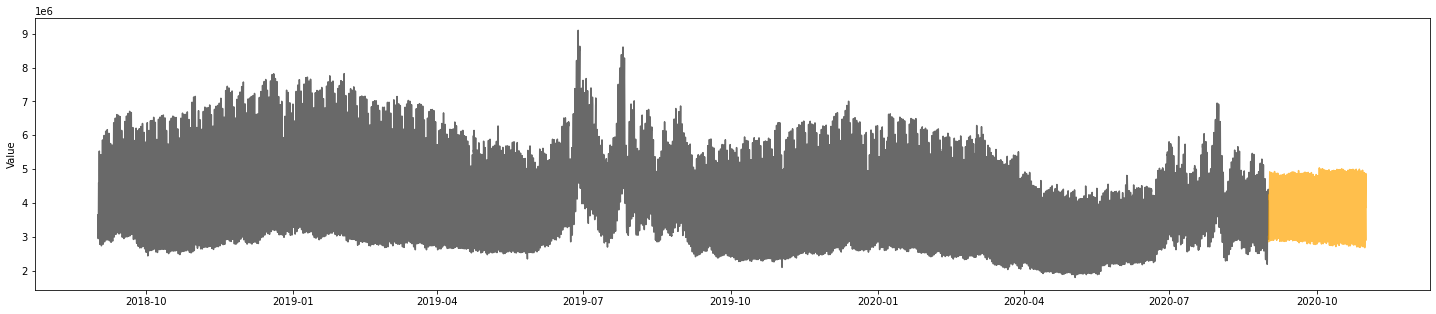

In [38]:
#plot LSTM
final_plot(data, final, 'LSTM', 'orange')

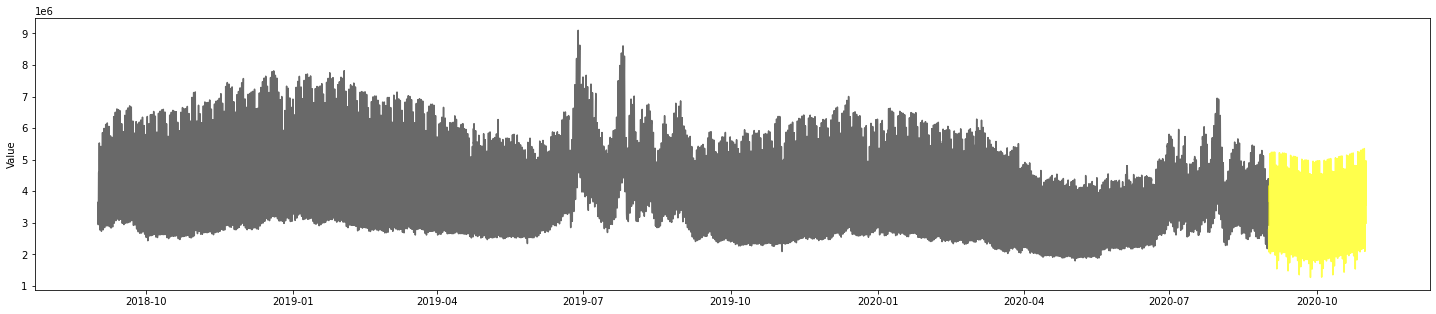

In [35]:
#plot prophet
final_plot(data, final, 'prophet', 'yellow')

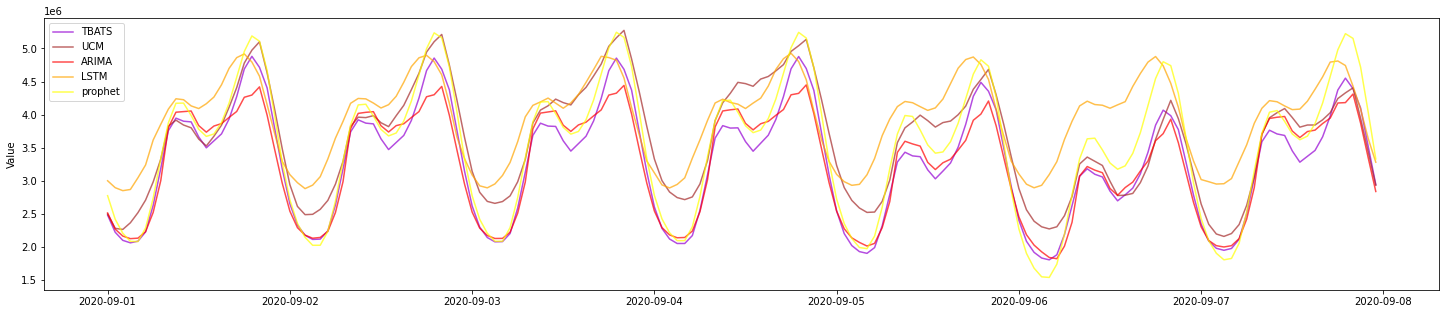

In [48]:
plt.figure(figsize=(25, 5))
plt.plot(final['TBATS'][:168], color='darkviolet', label='TBATS', alpha=0.7)
plt.plot(final['UCM'][:168], color='brown', label='UCM', alpha=0.7)
plt.plot(final['ARIMA'][:168], color='red', label='ARIMA', alpha=0.7)
plt.plot(final['LSTM'][:168], color='orange', label='LSTM', alpha=0.7)
plt.plot(final['prophet'][:168], color='yellow', label='prophet', alpha=0.7)
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.show()

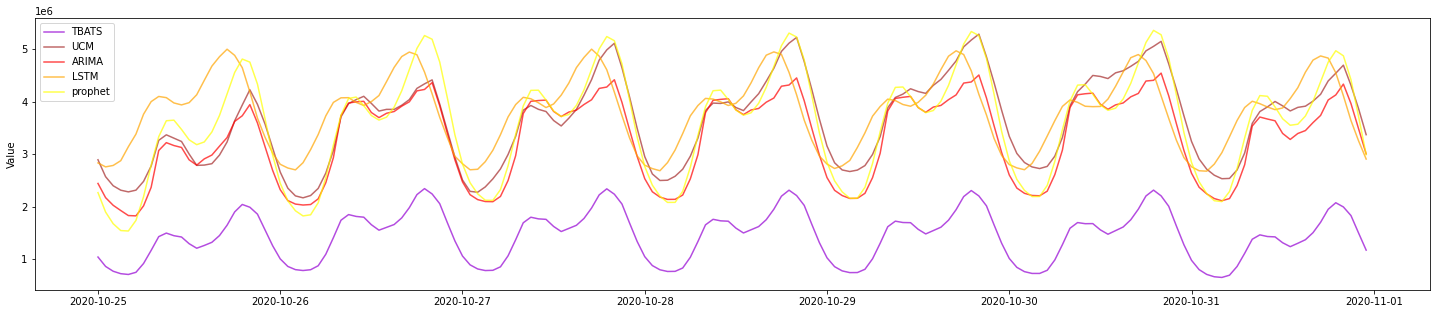

In [50]:
plt.figure(figsize=(25, 5))
plt.plot(final['TBATS'][-168:], color='darkviolet', label='TBATS', alpha=0.7)
plt.plot(final['UCM'][-168:], color='brown', label='UCM', alpha=0.7)
plt.plot(final['ARIMA'][-168:], color='red', label='ARIMA', alpha=0.7)
plt.plot(final['LSTM'][-168:], color='orange', label='LSTM', alpha=0.7)
plt.plot(final['prophet'][-168:], color='yellow', label='prophet', alpha=0.7)
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.show()

In [51]:
finale=final.copy(deep=True)
finale['Data']=pd.to_datetime(finale.index.year.astype('str')+'-'+finale.index.month.astype('str')+'-'+finale.index.day.astype('str'),  format = "%Y-%m-%d" )
finale['Ora']=finale.index.hour
finale['Ora']=finale['Ora']+1
finale['Ora']=finale['Ora'].astype(str)

In [52]:
#I rearrange the columns
finale.rename(columns={"LSTM": "ML"}, inplace=True)
finale = finale[['Data', 'Ora', 'ARIMA',  'UCM', 'ML']]

In [53]:
#save to csv file
finale.to_csv('SDMTSA_847700.csv', sep=';', index=False)